# Introduction

Today's class will continue our introduction to **working with data in R - fitting linear models**.

## Today's Objective

Our goal for the day is to become familiar with tools in R used for fitting a simple linear model. We would like to achieve the following objectives:
1. See the basic syntax for linear models.
2. Learn about different plotting options.
3. Study summary statistics from our linear model.
4. Extract data from the linear model object.

If by the end of the class, you feel we haven't sufficiently covered one of these, speak up!

## A Working Example : Market Beta

<a href="https://en.wikipedia.org/wiki/Beta_(finance)" target="_blank">Today's example comes from finance</a>. In general, one can model the returns on an asset as a linear function of market returns:
$$
r = \alpha + \beta(r_m - r_f)
$$
where $(r, r_m, r_f)$ are the returns on an asset, returns on the market, and the risk free rate, respectively. This comes from the theoretical model known as the [Capital Asset Pricing Model (CAPM)](https://en.wikipedia.org/wiki/Capital_asset_pricing_model).

Whether you think this model is accurate (most studies reject the CAPM), it is a simple model and the data is easily available from Yahoo Finance.

## Loading Data
Last week we created a data set of 19 ETF's. This week we are going to use that data set, so let's load it into the namespace:

In [2]:
mydir <- "/home/tmabbot/MEGA/Teaching/Programming/Courses/Week7/data/"
data <- read.csv(paste(mydir, "raw_returns.csv", sep=""),
                 row.names=1)
head(data)

SPY GDX VXX EEM TVIX          XLF          EWJ XIV
2000-08-08  0.0080508475  NA  NA  NA   NA  0.000000000  0.004608295  NA
2000-08-09 -0.0084068937  NA  NA  NA   NA -0.006749156  0.009174312  NA
2000-08-10 -0.0048752590  NA  NA  NA   NA -0.005662514 -0.004545455  NA
2000-08-11  0.0046858375  NA  NA  NA   NA  0.015376073  0.013698630  NA
2000-08-14  0.0127199531  NA  NA  NA   NA  0.012899389 -0.004504505  NA
2000-08-15 -0.0008373459  NA  NA  NA   NA -0.018272638  0.009049774  NA
                    IWM EFA DUST USO         QQQ FXI         EWZ VWO GDXJ XOP
2000-08-08 -0.001838235  NA   NA  NA  0.02240326  NA  0.00000000  NA   NA  NA
2000-08-09 -0.007213093  NA   NA  NA -0.02656042  NA  0.00000000  NA   NA  NA
2000-08-10 -0.005719507  NA   NA  NA -0.01978172  NA -0.03184713  NA   NA  NA
2000-08-11  0.017412935  NA   NA  NA  0.01391788  NA  0.02302632  NA   NA  NA
2000-08-14  0.010391198  NA   NA  NA  0.02127660  NA  0.00000000  NA   NA  NA
2000-08-15 -0.014519056  NA   NA  NA  0.00000000  NA  0.02893891  NA   NA  NA
           HYG
2000-08-08  NA
2000-08-09  NA
2000-08-10  NA
2000-08-11  NA
2000-08-14  NA
2000-08-15  NA

In order to estimate our model, we need to calculate **excess returns**, or returns in excess of the risk free rate. To that end I have created a `.csv` file containing treasury yields, downloaded from [here](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldAll) (and contacted them to say XML is lame...).

Let's load that data set now:

In [3]:
# NOTE: the check.names fixes the column name correction
treasury <- read.csv(paste(mydir, "treasury.csv", sep=""),
                 row.names=1, check.names=FALSE)
head(treasury)

Date 1 Mo 3 Mo 6 Mo 1 Yr 2 Yr 3 Yr 5 Yr 7 Yr 10 Yr 20 Yr 30 Yr
1 01/02/90  N/A 7.83 7.89 7.81 7.87 7.90 7.87 7.98  7.94   N/A  8.00
2 01/03/90  N/A 7.89 7.94 7.85 7.94 7.96 7.92 8.04  7.99   N/A  8.04
3 01/04/90  N/A 7.84 7.90 7.82 7.92 7.93 7.91 8.02  7.98   N/A  8.04
4 01/05/90  N/A 7.79 7.85 7.79 7.90 7.94 7.92 8.03  7.99   N/A  8.06
5 01/08/90  N/A 7.79 7.88 7.81 7.90 7.95 7.92 8.05  8.02   N/A  8.09
6 01/09/90  N/A 7.80 7.82 7.78 7.91 7.94 7.92 8.05  8.02   N/A  8.10

Next we need to merge our treasury data with our stock data based on the date, but the date format is different. For this we can convert the string into a date object using `as.Date`, specifying the date format:

In [4]:
treasury$Date <- as.Date(treasury$Date, "%m/%d/%y")
head(treasury)

Date 1 Mo 3 Mo 6 Mo 1 Yr 2 Yr 3 Yr 5 Yr 7 Yr 10 Yr 20 Yr 30 Yr
1 1990-01-02  N/A 7.83 7.89 7.81 7.87 7.90 7.87 7.98  7.94   N/A  8.00
2 1990-01-03  N/A 7.89 7.94 7.85 7.94 7.96 7.92 8.04  7.99   N/A  8.04
3 1990-01-04  N/A 7.84 7.90 7.82 7.92 7.93 7.91 8.02  7.98   N/A  8.04
4 1990-01-05  N/A 7.79 7.85 7.79 7.90 7.94 7.92 8.03  7.99   N/A  8.06
5 1990-01-08  N/A 7.79 7.88 7.81 7.90 7.95 7.92 8.05  8.02   N/A  8.09
6 1990-01-09  N/A 7.80 7.82 7.78 7.91 7.94 7.92 8.05  8.02   N/A  8.10

You'll notice the values in `treasury$Date` are not what you would expect. However, they are simply in a particular format:

In [5]:
head(treasury$Date)

[1] "1990-01-02" "1990-01-03" "1990-01-04" "1990-01-05" "1990-01-08"
[6] "1990-01-09"

Now we can merge our two datasets on the date:

In [6]:
# First set the row names to be dates
rownames(treasury) <- treasury$Date
#rownames(data) <- as.Date(rownames(data), "%Y-%m-%d")
treasury$Date <- NULL
head(treasury)
#head(data)

1 Mo 3 Mo 6 Mo 1 Yr 2 Yr 3 Yr 5 Yr 7 Yr 10 Yr 20 Yr 30 Yr
1990-01-02  N/A 7.83 7.89 7.81 7.87 7.90 7.87 7.98  7.94   N/A  8.00
1990-01-03  N/A 7.89 7.94 7.85 7.94 7.96 7.92 8.04  7.99   N/A  8.04
1990-01-04  N/A 7.84 7.90 7.82 7.92 7.93 7.91 8.02  7.98   N/A  8.04
1990-01-05  N/A 7.79 7.85 7.79 7.90 7.94 7.92 8.03  7.99   N/A  8.06
1990-01-08  N/A 7.79 7.88 7.81 7.90 7.95 7.92 8.05  8.02   N/A  8.09
1990-01-09  N/A 7.80 7.82 7.78 7.91 7.94 7.92 8.05  8.02   N/A  8.10

In [7]:
# Try simply using the same merge operation we used before
rn <- rownames(treasury)
temp <- merge(data, treasury, by=0, all=TRUE)
rownames(temp) <- rn
head(temp)

ERROR: Error in `row.names<-.data.frame`(`*tmp*`, value = value): invalid 'row.names' length


Notice  there's an error. This is because the type of merge we performed was not the type of merge we wanted. Can you tell what happened by looking at the dimensions?

In [8]:
dim(temp)
dim(treasury)
dim(data)

[1] 6690   31

[1] 6661   11

[1] 4025   19

In [9]:
# Perform a left merge instead
rn <- rownames(data)
temp <- merge(data, treasury, by=0, all.x=TRUE)[,-1]
rownames(temp) <- rn
head(temp)

SPY GDX VXX EEM TVIX          XLF          EWJ XIV
2000-08-08  0.0080508475  NA  NA  NA   NA  0.000000000  0.004608295  NA
2000-08-09 -0.0084068937  NA  NA  NA   NA -0.006749156  0.009174312  NA
2000-08-10 -0.0048752590  NA  NA  NA   NA -0.005662514 -0.004545455  NA
2000-08-11  0.0046858375  NA  NA  NA   NA  0.015376073  0.013698630  NA
2000-08-14  0.0127199531  NA  NA  NA   NA  0.012899389 -0.004504505  NA
2000-08-15 -0.0008373459  NA  NA  NA   NA -0.018272638  0.009049774  NA
                    IWM EFA ⋯ 3 Mo 6 Mo 1 Yr 2 Yr 3 Yr 5 Yr 7 Yr 10 Yr 20 Yr
2000-08-08 -0.001838235  NA ⋯ 6.26 6.32 6.13 6.16 6.13 6.03 6.04  5.93  6.03
2000-08-09 -0.007213093  NA ⋯ 6.25 6.32 6.17 6.18 6.14 6.03 6.03  5.81  6.02
2000-08-10 -0.005719507  NA ⋯ 6.25 6.31 6.17 6.16 6.11 6.00 6.00  5.76  6.00
2000-08-11  0.017412935  NA ⋯ 6.29 6.35 6.24 6.25 6.19 6.07 6.06  5.79  6.04
2000-08-14  0.010391198  NA ⋯ 6.27 6.36 6.21 6.25 6.20 6.07 6.05  5.78  6.00
2000-08-15 -0.014519056  NA ⋯ 6.28 6.37 6.22 6.28 6.24 6.11 6.08  5.81  6.02
           30 Yr
2000-08-08  5.73
2000-08-09  5.73
2000-08-10  5.68
2000-08-11  5.72
2000-08-14  5.70
2000-08-15  5.72

Great! Now we have our merged data set, we can in fact remove some of the columns. We only really need the 3-month treasury bill, and the easiest way to remove this is to only merge this column:

In [10]:
# Perform a left merge instead
rn <- rownames(data)
temp <- merge(data, treasury["3 Mo"], by=0, all.x=TRUE)[,-1]
rownames(temp) <- rn
head(temp)

SPY GDX VXX EEM TVIX          XLF          EWJ XIV
2000-08-08  0.0080508475  NA  NA  NA   NA  0.000000000  0.004608295  NA
2000-08-09 -0.0084068937  NA  NA  NA   NA -0.006749156  0.009174312  NA
2000-08-10 -0.0048752590  NA  NA  NA   NA -0.005662514 -0.004545455  NA
2000-08-11  0.0046858375  NA  NA  NA   NA  0.015376073  0.013698630  NA
2000-08-14  0.0127199531  NA  NA  NA   NA  0.012899389 -0.004504505  NA
2000-08-15 -0.0008373459  NA  NA  NA   NA -0.018272638  0.009049774  NA
                    IWM EFA DUST USO         QQQ FXI         EWZ VWO GDXJ XOP
2000-08-08 -0.001838235  NA   NA  NA  0.02240326  NA  0.00000000  NA   NA  NA
2000-08-09 -0.007213093  NA   NA  NA -0.02656042  NA  0.00000000  NA   NA  NA
2000-08-10 -0.005719507  NA   NA  NA -0.01978172  NA -0.03184713  NA   NA  NA
2000-08-11  0.017412935  NA   NA  NA  0.01391788  NA  0.02302632  NA   NA  NA
2000-08-14  0.010391198  NA   NA  NA  0.02127660  NA  0.00000000  NA   NA  NA
2000-08-15 -0.014519056  NA   NA  NA  0.00000000  NA  0.02893891  NA   NA  NA
           HYG 3 Mo
2000-08-08  NA 6.26
2000-08-09  NA 6.25
2000-08-10  NA 6.25
2000-08-11  NA 6.29
2000-08-14  NA 6.27
2000-08-15  NA 6.28

Lastly, let's convert our treasury rate from annual to daily, convert it into a decimal, and subtract it from all of our returns to get the excess returns.

To do this, we'll first use `lapply`, a new funciton we have yet to use:

In [11]:
?lapply

lapply                  package:base                   R Documentation

_A_p_p_l_y _a _F_u_n_c_t_i_o_n _o_v_e_r _a _L_i_s_t _o_r _V_e_c_t_o_r

_D_e_s_c_r_i_p_t_i_o_n:

     ‘lapply’ returns a list of the same length as ‘X’, each element of
     which is the result of applying ‘FUN’ to the corresponding element
     of ‘X’.

     ‘sapply’ is a user-friendly version and wrapper of ‘lapply’ by
     default returning a vector, matrix or, if ‘simplify = "array"’, an
     array if appropriate, by applying ‘simplify2array()’.  ‘sapply(x,
     f, simplify = FALSE, USE.NAMES = FALSE)’ is the same as ‘lapply(x,
     f)’.

     ‘vapply’ is similar to ‘sapply’, but has a pre-specified type of
     return value, so it can be safer (and sometimes faster) to use.

     ‘replicate’ is a wrapper for the common use of ‘sapply’ for
     repeated evaluation of an expression (which will usually involve
     random number generation).

     ‘simplify2array()’ is the utility called from ‘sapply()’ when
     ‘simplify’ is not false and is similarly called from ‘mapply()’.

_U_s_a_g_e:

     lapply(X, FUN, ...)
     
     sapply(X, FUN, ..., simplify = TRUE, USE.NAMES = TRUE)
     
     vapply(X, FUN, FUN.VALUE, ..., USE.NAMES = TRUE)
     
     replicate(n, expr, simplify = "array")
     
     simplify2array(x, higher = TRUE)
     
_A_r_g_u_m_e_n_t_s:

       X: a vector (atomic or list) or an ‘expression’ object.  Other
          objects (including classed objects) will be coerced by
          ‘base::as.list’.

     FUN: the function to be applied to each element of ‘X’: see
          ‘Details’.  In the case of functions like ‘+’, ‘%*%’, the
          function name must be backquoted or quoted.

     ...: optional arguments to ‘FUN’.

simplify: logical or character string; should the result be simplified
          to a vector, matrix or higher dimensional array if possible?
          For ‘sapply’ it must be named and not abbreviated.  The
          default value, ‘TRUE’, returns a vector or matrix if
          appropriate, whereas if ‘simplify = "array"’ the result may
          be an ‘array’ of “rank” (=‘length(dim(.))’) one higher than
          the result of ‘FUN(X[[i]])’.

USE.NAMES: logical; if ‘TRUE’ and if ‘X’ is character, use ‘X’ as
          ‘names’ for the result unless it had names already.  Since
          this argument follows ‘...’ its name cannot be abbreviated.

FUN.VALUE: a (generalized) vector; a template for the return value from
          FUN.  See ‘Details’.

       n: integer: the number of replications.

    expr: the expression (a language object, usually a call) to
          evaluate repeatedly.

       x: a list, typically returned from ‘lapply()’.

  higher: logical; if true, ‘simplify2array()’ will produce a (“higher
          rank”) array when appropriate, whereas ‘higher = FALSE’ would
          return a matrix (or vector) only.  These two cases correspond
          to ‘sapply(*, simplify = "array")’ or ‘simplify = TRUE’,
          respectively.

_D_e_t_a_i_l_s:

     ‘FUN’ is found by a call to ‘match.fun’ and typically is specified
     as a function or a symbol (e.g., a backquoted name) or a character
     string specifying a function to be searched for from the
     environment of the call to ‘lapply’.

     Function ‘FUN’ must be able to accept as input any of the elements
     of ‘X’.  If the latter is an atomic vector, ‘FUN’ will always be
     passed a length-one vector of the same type as ‘X’.

     Arguments in ‘...’ cannot have the same name as any of the other
     arguments, and care may be needed to avoid partial matching to
     ‘FUN’.  In general-purpose code it is good practice to name the
     first two arguments ‘X’ and ‘FUN’ if ‘...’ is passed through: this
     both avoids partial matching to ‘FUN’ and ensures that a sensible
     error message is given if arguments named ‘X’ or ‘FUN’ are passed
     through ‘...’.

     Simplification 

Let's try applying this to the head of our treasury rate column:

In [12]:
lapply(head(temp[,"3 Mo"]), function(x){x <- x/365; x})

Warning message:
In Ops.factor(x, 365): ‘/’ not meaningful for factorsWarning message:
In Ops.factor(x, 365): ‘/’ not meaningful for factorsWarning message:
In Ops.factor(x, 365): ‘/’ not meaningful for factorsWarning message:
In Ops.factor(x, 365): ‘/’ not meaningful for factorsWarning message:
In Ops.factor(x, 365): ‘/’ not meaningful for factorsWarning message:
In Ops.factor(x, 365): ‘/’ not meaningful for factors

[[1]]
[1] NA

[[2]]
[1] NA

[[3]]
[1] NA

[[4]]
[1] NA

[[5]]
[1] NA

[[6]]
[1] NA

Now we have a problem. Apparently the column is not of a numeric type, but a `factor`. Thanks for nothing R!

Let's see if the same is true for the rest of our data frame. We can do this using `sapply`:

In [13]:
?sapply

lapply                  package:base                   R Documentation

_A_p_p_l_y _a _F_u_n_c_t_i_o_n _o_v_e_r _a _L_i_s_t _o_r _V_e_c_t_o_r

_D_e_s_c_r_i_p_t_i_o_n:

     ‘lapply’ returns a list of the same length as ‘X’, each element of
     which is the result of applying ‘FUN’ to the corresponding element
     of ‘X’.

     ‘sapply’ is a user-friendly version and wrapper of ‘lapply’ by
     default returning a vector, matrix or, if ‘simplify = "array"’, an
     array if appropriate, by applying ‘simplify2array()’.  ‘sapply(x,
     f, simplify = FALSE, USE.NAMES = FALSE)’ is the same as ‘lapply(x,
     f)’.

     ‘vapply’ is similar to ‘sapply’, but has a pre-specified type of
     return value, so it can be safer (and sometimes faster) to use.

     ‘replicate’ is a wrapper for the common use of ‘sapply’ for
     repeated evaluation of an expression (which will usually involve
     random number generation).

     ‘simplify2array()’ is the utility called from ‘sapply()’ when
     ‘simplify’ is not false and is similarly called from ‘mapply()’.

_U_s_a_g_e:

     lapply(X, FUN, ...)
     
     sapply(X, FUN, ..., simplify = TRUE, USE.NAMES = TRUE)
     
     vapply(X, FUN, FUN.VALUE, ..., USE.NAMES = TRUE)
     
     replicate(n, expr, simplify = "array")
     
     simplify2array(x, higher = TRUE)
     
_A_r_g_u_m_e_n_t_s:

       X: a vector (atomic or list) or an ‘expression’ object.  Other
          objects (including classed objects) will be coerced by
          ‘base::as.list’.

     FUN: the function to be applied to each element of ‘X’: see
          ‘Details’.  In the case of functions like ‘+’, ‘%*%’, the
          function name must be backquoted or quoted.

     ...: optional arguments to ‘FUN’.

simplify: logical or character string; should the result be simplified
          to a vector, matrix or higher dimensional array if possible?
          For ‘sapply’ it must be named and not abbreviated.  The
          default value, ‘TRUE’, returns a vector or matrix if
          appropriate, whereas if ‘simplify = "array"’ the result may
          be an ‘array’ of “rank” (=‘length(dim(.))’) one higher than
          the result of ‘FUN(X[[i]])’.

USE.NAMES: logical; if ‘TRUE’ and if ‘X’ is character, use ‘X’ as
          ‘names’ for the result unless it had names already.  Since
          this argument follows ‘...’ its name cannot be abbreviated.

FUN.VALUE: a (generalized) vector; a template for the return value from
          FUN.  See ‘Details’.

       n: integer: the number of replications.

    expr: the expression (a language object, usually a call) to
          evaluate repeatedly.

       x: a list, typically returned from ‘lapply()’.

  higher: logical; if true, ‘simplify2array()’ will produce a (“higher
          rank”) array when appropriate, whereas ‘higher = FALSE’ would
          return a matrix (or vector) only.  These two cases correspond
          to ‘sapply(*, simplify = "array")’ or ‘simplify = TRUE’,
          respectively.

_D_e_t_a_i_l_s:

     ‘FUN’ is found by a call to ‘match.fun’ and typically is specified
     as a function or a symbol (e.g., a backquoted name) or a character
     string specifying a function to be searched for from the
     environment of the call to ‘lapply’.

     Function ‘FUN’ must be able to accept as input any of the elements
     of ‘X’.  If the latter is an atomic vector, ‘FUN’ will always be
     passed a length-one vector of the same type as ‘X’.

     Arguments in ‘...’ cannot have the same name as any of the other
     arguments, and care may be needed to avoid partial matching to
     ‘FUN’.  In general-purpose code it is good practice to name the
     first two arguments ‘X’ and ‘FUN’ if ‘...’ is passed through: this
     both avoids partial matching to ‘FUN’ and ensures that a sensible
     error message is given if arguments named ‘X’ or ‘FUN’ are passed
     through ‘...’.

     Simplification 

Great, this is the most helpful documentation ever. You ask for help on two different functions and you get... the same thing. <a href="http://stackoverflow.com/questions/3505701/r-grouping-functions-sapply-vs-lapply-vs-apply-vs-tapply-vs-by-vs-aggrega" target="_blank">HERE</a> is a very useful post on StackOverflow about the difference betweent the different apply's. <a href="https://nsaunders.wordpress.com/2010/08/20/a-brief-introduction-to-apply-in-r/" target="_blank">HERE</a> is an even better blog post.

Essentially these functions do exactly the same thing, applying some other function along elements in a data structure, and return a particular data type. These functions are really just loops, with which you should be thoroughly familiar. You should keep in mind though that if your computer starts using lots of memory, it may be `apply` who is to blame... depending on the data type it may create a new object of the same size!

In [45]:
# Loop over columns of temp returning the class
sapply(temp, class)

# Note that lapply also works, but returns a list instead of a vector
lapply(temp, class)

SPY       GDX       VXX       EEM      TVIX       XLF       EWJ       XIV 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
      IWM       EFA      DUST       USO       QQQ       FXI       EWZ       VWO 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     GDXJ       XOP       HYG      3 Mo 
"numeric" "numeric" "numeric"  "factor"

$SPY
[1] "numeric"

$GDX
[1] "numeric"

$VXX
[1] "numeric"

$EEM
[1] "numeric"

$TVIX
[1] "numeric"

$XLF
[1] "numeric"

$EWJ
[1] "numeric"

$XIV
[1] "numeric"

$IWM
[1] "numeric"

$EFA
[1] "numeric"

$DUST
[1] "numeric"

$USO
[1] "numeric"

$QQQ
[1] "numeric"

$FXI
[1] "numeric"

$EWZ
[1] "numeric"

$VWO
[1] "numeric"

$GDXJ
[1] "numeric"

$XOP
[1] "numeric"

$HYG
[1] "numeric"

$`3 Mo`
[1] "factor"

So, only one issue to deal with. Let's try simply converting using `as.numeric`:

In [15]:
as.numeric(head(temp[,"3 Mo"]))

[1] 572 571 571 575 573 574

That didn't work... The problem is we need to first convert to a `character` vector because R doesn't seem capable of getting its act together:

In [16]:
as.numeric(as.character(head(temp[,"3 Mo"])))

[1] 6.26 6.25 6.25 6.29 6.27 6.28

So let's replace the whole column:

In [50]:
Temp <- temp
Temp[, "3 Mo"] <- as.numeric(as.character(temp[,"3 Mo"]))
sapply(Temp, class)

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

SPY       GDX       VXX       EEM      TVIX       XLF       EWJ       XIV 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
      IWM       EFA      DUST       USO       QQQ       FXI       EWZ       VWO 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     GDXJ       XOP       HYG      3 Mo 
"numeric" "numeric" "numeric" "numeric"

In [51]:
# In case you would like to look at the NA's
#temp[is.na(temp[,"3 Mo"]),]

Finally, let's carry out our desired calculation, converting to daily returns:

In [52]:
lapply(head(Temp["3 Mo"]), function(x){x <- x/36500; x})

$`3 Mo`
[1] 0.0001715068 0.0001712329 0.0001712329 0.0001723288 0.0001717808
[6] 0.0001720548

In [53]:
Temp["3 Mo"] <- lapply(Temp["3 Mo"], function(x){x <- x/36500; x})

Now, let's get the column names and loop through, subtracting the risk free rate:

In [63]:
colnames(Temp)[1:dim(Temp)[2]-1]

[1] "SPY"  "GDX"  "VXX"  "EEM"  "TVIX" "XLF"  "EWJ"  "XIV"  "IWM"  "EFA" 
[11] "DUST" "USO"  "QQQ"  "FXI"  "EWZ"  "VWO"  "GDXJ" "XOP"  "HYG"

In [66]:
# We could use a loop or one line
Temp2 <- Temp

for(column in colnames(Temp)[-length(colnames(Temp))]){
    Temp[column] <- Temp[column] - Temp["3 Mo"]
}

tics <- colnames(Temp)[1:dim(Temp)[2]-1]
Temp2[tics] <- Temp2[tics] - Temp2[,'3 Mo']

head(Temp)
head(Temp2)

SPY GDX VXX EEM TVIX           XLF          EWJ XIV
2000-08-08  0.007193313  NA  NA  NA   NA -0.0008575342  0.003750761  NA
2000-08-09 -0.009263058  NA  NA  NA   NA -0.0076053207  0.008318148  NA
2000-08-10 -0.005731423  NA  NA  NA   NA -0.0065186785 -0.005401619  NA
2000-08-11  0.003824194  NA  NA  NA   NA  0.0145144291  0.012836986  NA
2000-08-14  0.011861049  NA  NA  NA   NA  0.0120404851 -0.005363409  NA
2000-08-15 -0.001697620  NA  NA  NA   NA -0.0191329118  0.008189500  NA
                    IWM EFA DUST USO          QQQ FXI           EWZ VWO GDXJ
2000-08-08 -0.002695770  NA   NA  NA  0.021545724  NA -0.0008575342  NA   NA
2000-08-09 -0.008069257  NA   NA  NA -0.027416589  NA -0.0008561644  NA   NA
2000-08-10 -0.006575671  NA   NA  NA -0.020637883  NA -0.0327032981  NA   NA
2000-08-11  0.016551291  NA   NA  NA  0.013056241  NA  0.0221646720  NA   NA
2000-08-14  0.009532294  NA   NA  NA  0.020417692  NA -0.0008589041  NA   NA
2000-08-15 -0.015379330  NA   NA  NA -0.000860274  NA  0.0280786328  NA   NA
           XOP HYG         3 Mo
2000-08-08  NA  NA 0.0001715068
2000-08-09  NA  NA 0.0001712329
2000-08-10  NA  NA 0.0001712329
2000-08-11  NA  NA 0.0001723288
2000-08-14  NA  NA 0.0001717808
2000-08-15  NA  NA 0.0001720548

SPY GDX VXX EEM TVIX           XLF          EWJ XIV
2000-08-08  0.007193313  NA  NA  NA   NA -0.0008575342  0.003750761  NA
2000-08-09 -0.009263058  NA  NA  NA   NA -0.0076053207  0.008318148  NA
2000-08-10 -0.005731423  NA  NA  NA   NA -0.0065186785 -0.005401619  NA
2000-08-11  0.003824194  NA  NA  NA   NA  0.0145144291  0.012836986  NA
2000-08-14  0.011861049  NA  NA  NA   NA  0.0120404851 -0.005363409  NA
2000-08-15 -0.001697620  NA  NA  NA   NA -0.0191329118  0.008189500  NA
                    IWM EFA DUST USO          QQQ FXI           EWZ VWO GDXJ
2000-08-08 -0.002695770  NA   NA  NA  0.021545724  NA -0.0008575342  NA   NA
2000-08-09 -0.008069257  NA   NA  NA -0.027416589  NA -0.0008561644  NA   NA
2000-08-10 -0.006575671  NA   NA  NA -0.020637883  NA -0.0327032981  NA   NA
2000-08-11  0.016551291  NA   NA  NA  0.013056241  NA  0.0221646720  NA   NA
2000-08-14  0.009532294  NA   NA  NA  0.020417692  NA -0.0008589041  NA   NA
2000-08-15 -0.015379330  NA   NA  NA -0.000860274  NA  0.0280786328  NA   NA
           XOP HYG         3 Mo
2000-08-08  NA  NA 0.0001715068
2000-08-09  NA  NA 0.0001712329
2000-08-10  NA  NA 0.0001712329
2000-08-11  NA  NA 0.0001723288
2000-08-14  NA  NA 0.0001717808
2000-08-15  NA  NA 0.0001720548

Finally, let's drop all rows that contain `NA` (NOTE: we could have kept these, but we would have different sample sizes for different variables):

In [69]:
Temp <- na.omit(Temp)
head(Temp)

SPY          GDX          VXX          EEM        TVIX
2010-12-08  0.0036430277 -0.018936867 -0.027417882 -0.006425309 -0.04332287
2010-12-09  0.0038744219  0.003738975 -0.013079306 -0.003457081 -0.04838353
2010-12-10  0.0057999115  0.003726291 -0.010656106  0.004509984 -0.01690920
2010-12-13  0.0006220854  0.009061531  0.014665998  0.006418581  0.03615127
2010-12-14  0.0008625606 -0.001467028  0.005407289  0.001472308  0.01088854
2010-12-15 -0.0045912484 -0.018367786  0.022859972 -0.016203122  0.04746283
                     XLF          EWJ          XIV           IWM          EFA
2010-12-08  0.0164484903  0.002820361  0.017324099 -0.0006734991  0.002952485
2010-12-09  0.0122944966  0.001869396  0.022568420  0.0033782086  0.002596376
2010-12-10  0.0089450599 -0.002845329  0.008529907  0.0124838064  0.002243079
2010-12-13 -0.0006550657  0.013211966 -0.014201945 -0.0051652682  0.010737720
2010-12-14 -0.0089094368  0.003710795 -0.006745131 -0.0005376779  0.001524516
2010-12-15 -0.0083471730 -0.006524754 -0.021786228 -0.0031235372 -0.013217670
                    DUST           USO           QQQ          FXI           EWZ
2010-12-08  0.0286356039  0.0042122564  0.0036914230 -0.015705998 -0.0130244488
2010-12-09 -0.0115465316 -0.0005460485  0.0009053596  0.001366549 -0.0124039340
2010-12-10 -0.0060916662 -0.0073978559  0.0066328660  0.001596560  0.0089202655
2010-12-13 -0.0183534734  0.0060867011 -0.0035074812  0.010110675  0.0159783817
2010-12-14 -0.0002695519  0.0002434531  0.0018211280 -0.002072064  0.0008905401
2010-12-15  0.0370916305  0.0023554920 -0.0044309794 -0.023317511 -0.0208227916
                    VWO         GDXJ          XOP           HYG         3 Mo
2010-12-08 -0.006116848 -0.020549169 -0.012018974 -0.0032488792 4.109589e-06
2010-12-09 -0.002345764 -0.003632693  0.003763382 -0.0021411682 3.835616e-06
2010-12-10  0.004434238  0.004817782  0.003155615  0.0004298807 3.561644e-06
2010-12-13  0.005255940  0.011769587  0.006899143 -0.0050546346 4.109589e-06
2010-12-14  0.001029190  0.003784446 -0.008267200  0.0049265511 4.109589e-06
2010-12-15 -0.014700386 -0.026553152 -0.004572712 -0.0039350207 3.835616e-06

That's it! We now have a dataset with the excess returns for all our stocks. Let's rename it: 

In [70]:
data <- Temp
write.csv(data, paste(mydir, "returns_free.csv", sep=""))

## Fitting Our First Linear Model
To start off, let's calculate the beta for the first etf in the list, `GDX`. To do this we define a linear model using the `lm` function:

In [71]:
?lm

lm                    package:stats                    R Documentation

_F_i_t_t_i_n_g _L_i_n_e_a_r _M_o_d_e_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     ‘lm’ is used to fit linear models.  It can be used to carry out
     regression, single stratum analysis of variance and analysis of
     covariance (although ‘aov’ may provide a more convenient interface
     for these).

_U_s_a_g_e:

     lm(formula, data, subset, weights, na.action,
        method = "qr", model = TRUE, x = FALSE, y = FALSE, qr = TRUE,
        singular.ok = TRUE, contrasts = NULL, offset, ...)
     
_A_r_g_u_m_e_n_t_s:

 formula: an object of class ‘"formula"’ (or one that can be coerced to
          that class): a symbolic description of the model to be
          fitted.  The details of model specification are given under
          ‘Details’.

    data: an optional data frame, list or environment (or object
          coercible by ‘as.data.frame’ to a data frame) containing the
          variables in the model.  If not found in ‘data’, the
          variables are taken from ‘environment(formula)’, typically
          the environment from which ‘lm’ is called.

  subset: an optional vector specifying a subset of observations to be
          used in the fitting process.

 weights: an optional vector of weights to be used in the fitting
          process.  Should be ‘NULL’ or a numeric vector.  If non-NULL,
          weighted least squares is used with weights ‘weights’ (that
          is, minimizing ‘sum(w*e^2)’); otherwise ordinary least
          squares is used.  See also ‘Details’,

na.action: a function which indicates what should happen when the data
          contain ‘NA’s.  The default is set by the ‘na.action’ setting
          of ‘options’, and is ‘na.fail’ if that is unset.  The
          ‘factory-fresh’ default is ‘na.omit’.  Another possible value
          is ‘NULL’, no action.  Value ‘na.exclude’ can be useful.

  method: the method to be used; for fitting, currently only ‘method =
          "qr"’ is supported; ‘method = "model.frame"’ returns the
          model frame (the same as with ‘model = TRUE’, see below).

model, x, y, qr: logicals.  If ‘TRUE’ the corresponding components of
          the fit (the model frame, the model matrix, the response, the
          QR decomposition) are returned.

singular.ok: logical. If ‘FALSE’ (the default in S but not in R) a
          singular fit is an error.

contrasts: an optional list. See the ‘contrasts.arg’ of
          ‘model.matrix.default’.

  offset: this can be used to specify an _a priori_ known component to
          be included in the linear predictor during fitting.  This
          should be ‘NULL’ or a numeric vector of length equal to the
          number of cases.  One or more ‘offset’ terms can be included
          in the formula instead or as well, and if more than one are
          specified their sum is used.  See ‘model.offset’.

     ...: additional arguments to be passed to the low level regression
          fitting functions (see below).

_D_e_t_a_i_l_s:

     Models for ‘lm’ are specified symbolically.  A typical model has
     the form ‘response ~ terms’ where ‘response’ is the (numeric)
     response vector and ‘terms’ is a series of terms which specifies a
     linear predictor for ‘response’.  A terms specification of the
     form ‘first + second’ indicates all the terms in ‘first’ together
     with all the terms in ‘second’ with duplicates removed.  A
     specification of the form ‘first:second’ indicates the set of
     terms obtained by taking the interactions of all terms in ‘first’
     with all terms in ‘second’.  The specification ‘first*second’
     indicates the _cross_ of ‘first’ and ‘second’.  This is the same
     as ‘first + second + first:second’.

     If the formula includes an ‘offset’, this is evaluated and
     subtracted from the response.

     If ‘response’ is a matrix a linear model is fitted separately by
   

The syntax for the `fomula` variable is in S and takes a moment to get used to, but is easier if you see it:

In [72]:
first_model <- lm(data$GDX ~ data$SPY)

The `~` acts as an equal sign and we are essentially saying that excess returns on `GDX` are a linear function of excess market returns, here approximated by the `SPY`. The model is automatically fit with a constant, so if you would like to fit a model with no intercept you must include `-1` or `0 +` in the formula.

Let's take a look at our model:

In [73]:
class(first_model)
first_model

[1] "lm"


Call:
lm(formula = data$GDX ~ data$SPY)

Coefficients:
(Intercept)     data$SPY  
 -0.0004543    0.4812852  


The `lm` class has several useful methods (available in the help file), only some of which we'll use today. First of all, there is the **`summary`** function, which gives statistical properties and tests of the fitted model: 

In [75]:
summary(first_model)


Call:
lm(formula = data$GDX ~ data$SPY)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.107473 -0.015262 -0.001102  0.014526  0.114299 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0004543  0.0006730  -0.675      0.5    
data$SPY     0.4812852  0.0701226   6.863    1e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0253 on 1414 degrees of freedom
Multiple R-squared:  0.03224,	Adjusted R-squared:  0.03156 
F-statistic: 47.11 on 1 and 1414 DF,  p-value: 1.003e-11


All of the data within the summary can be called as a method of the linear model, e.g. the coefficients:

In [76]:
first_model$coefficients

(Intercept)      data$SPY 
-0.0004542561  0.4812851788

Another useful function is **`abline`**, which can be directly called using the linear model to add the fitted model line to a graph:

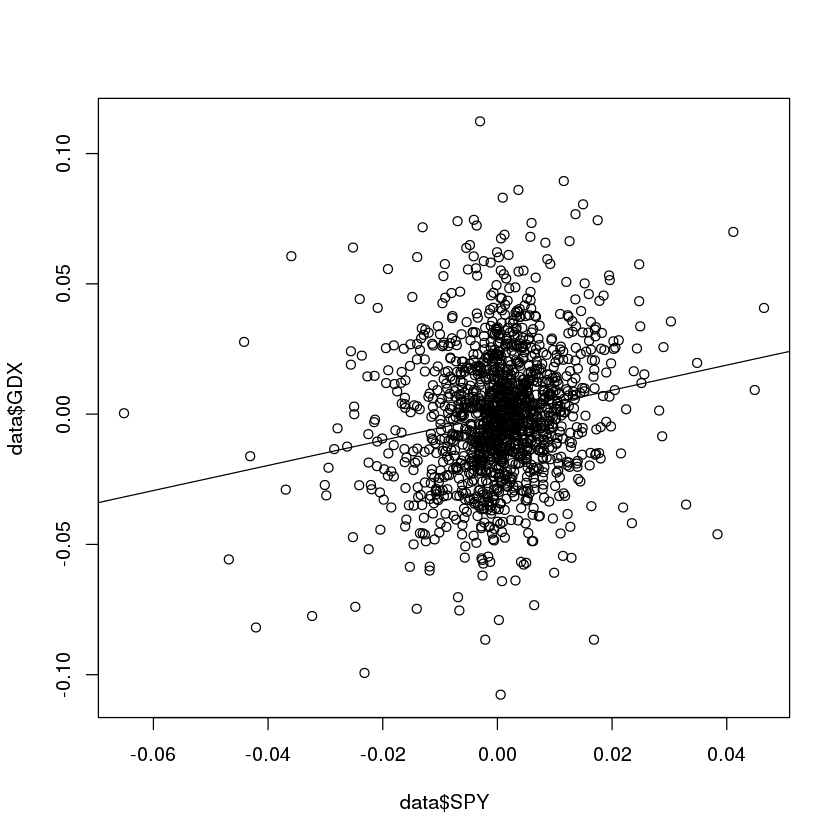

In [77]:
plot(data$SPY, data$GDX)
abline(first_model)

If we use **`plot`**, we get a plot of the residuals with a fitted line:

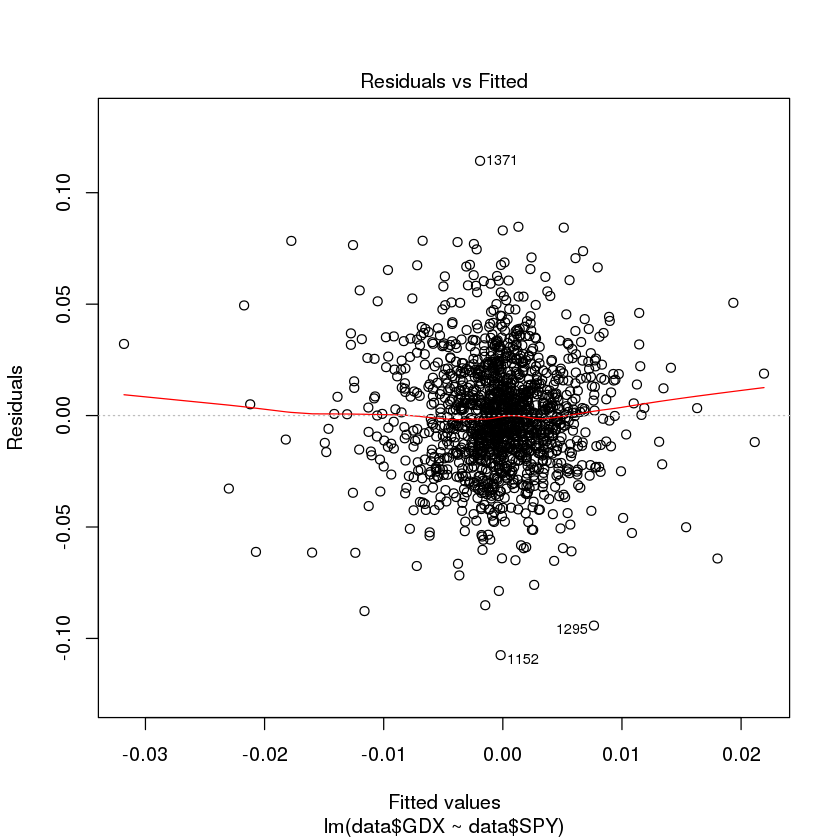

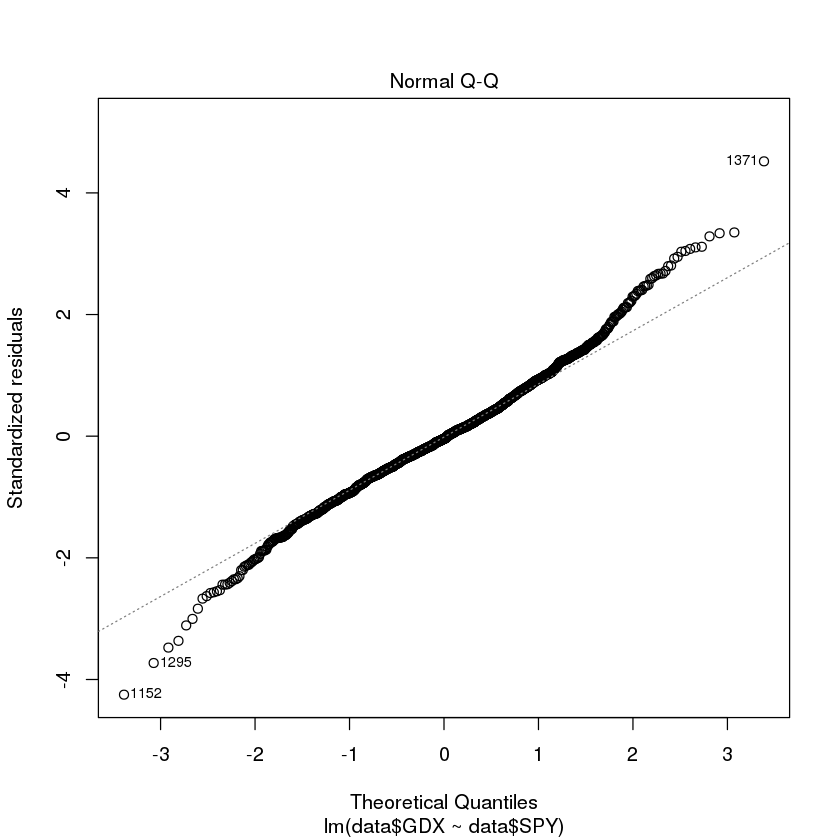

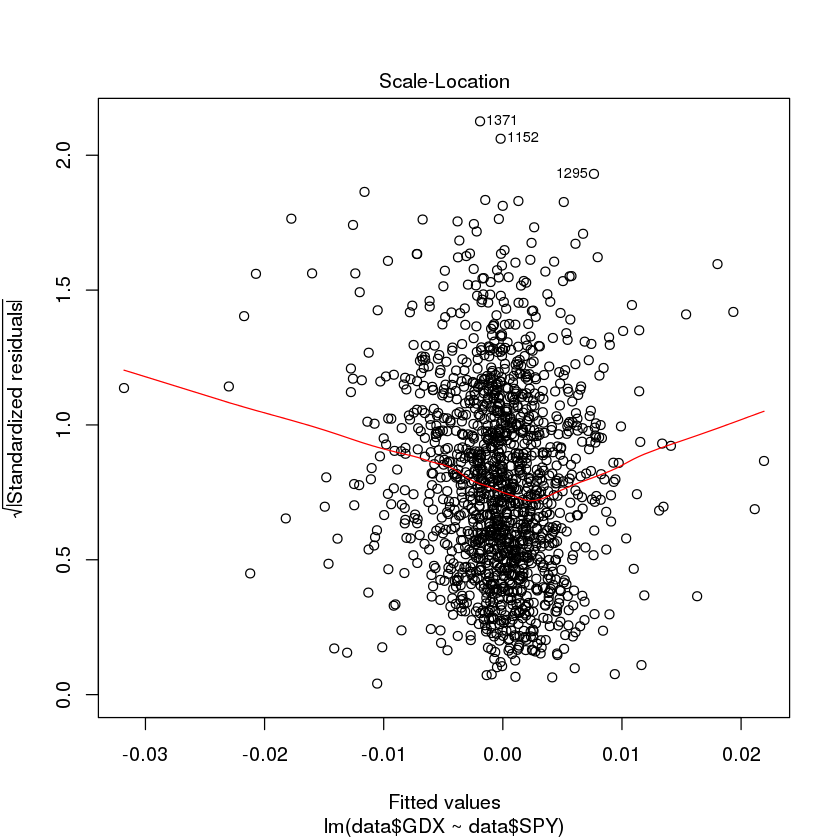

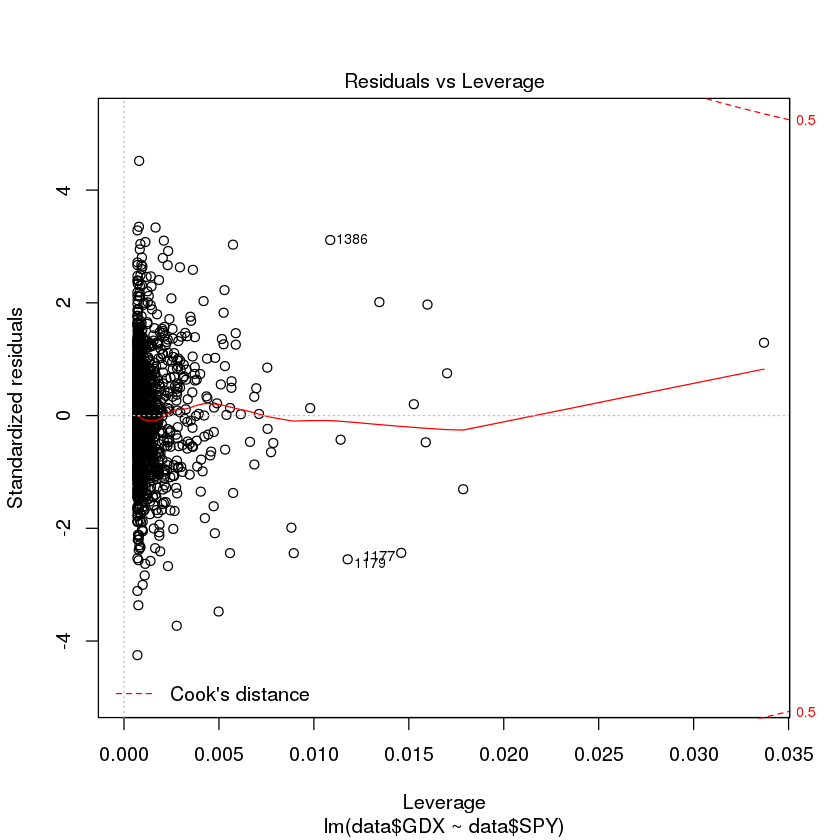

In [78]:
plot(first_model)

This is so cool! Our model is pretty awful, but the p-value is very small for the fitted value of $\beta$, so we can't reject it.

What about a stock with a negative covariance with the `SPY`?

## A Negatively Correlated Stock
Last week we saw that our 3rd ETF, `VXX`, covaries negatively with the `SPY`. What do you think this implies about the value of $\beta$?

Let's check it out:

In [79]:
sec_model <- lm(data$VXX ~ data$SPY)
summary(sec_model)


Call:
lm(formula = data$VXX ~ data$SPY)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08040 -0.01739 -0.00528  0.00725  2.94129 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.00338    0.00297   1.138    0.255    
data$SPY    -3.28466    0.30944 -10.615   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1117 on 1414 degrees of freedom
Multiple R-squared:  0.0738,	Adjusted R-squared:  0.07315 
F-statistic: 112.7 on 1 and 1414 DF,  p-value: < 2.2e-16


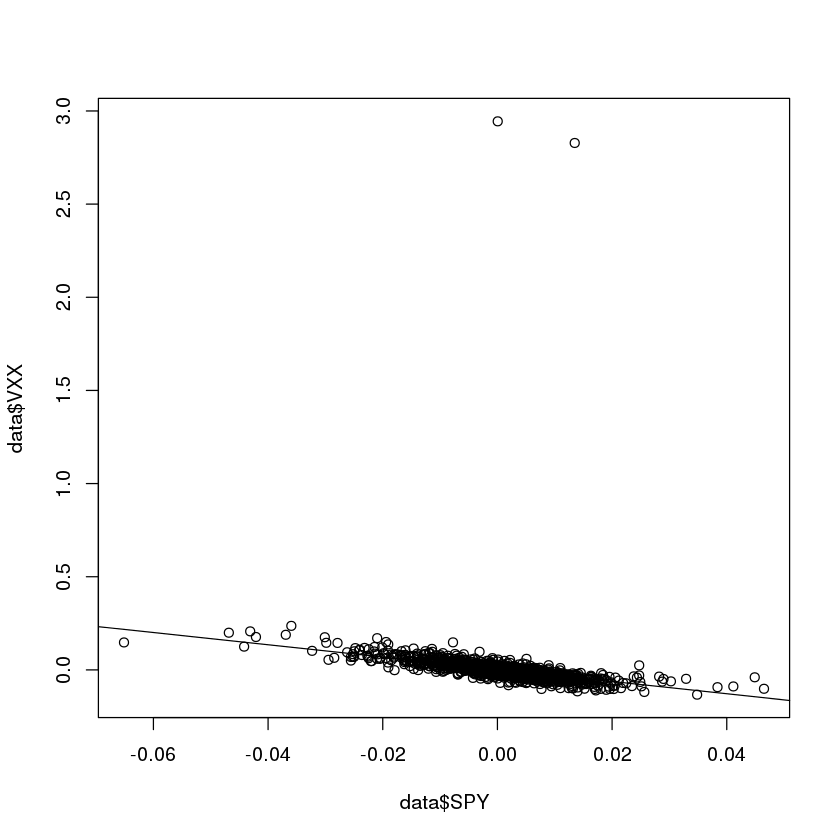

In [80]:
plot(data$SPY, data$VXX)
abline(sec_model)

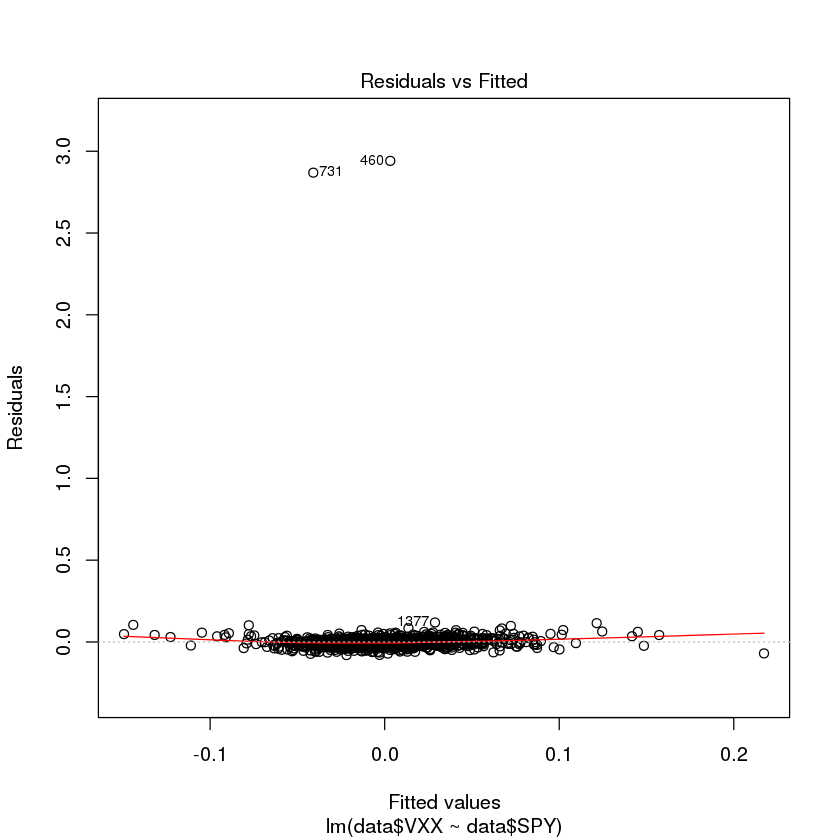

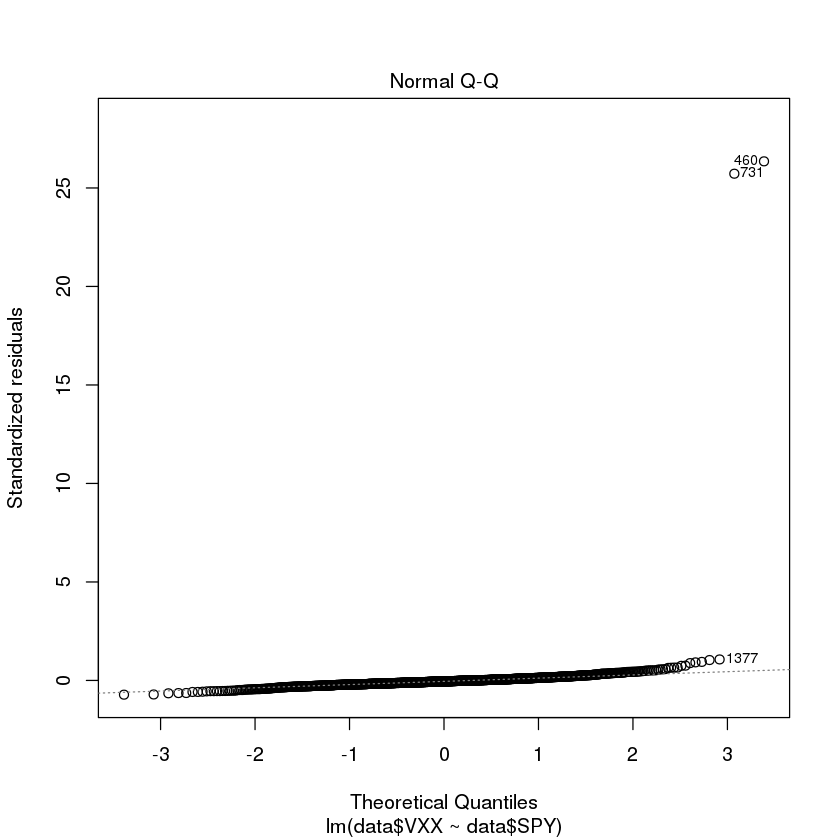

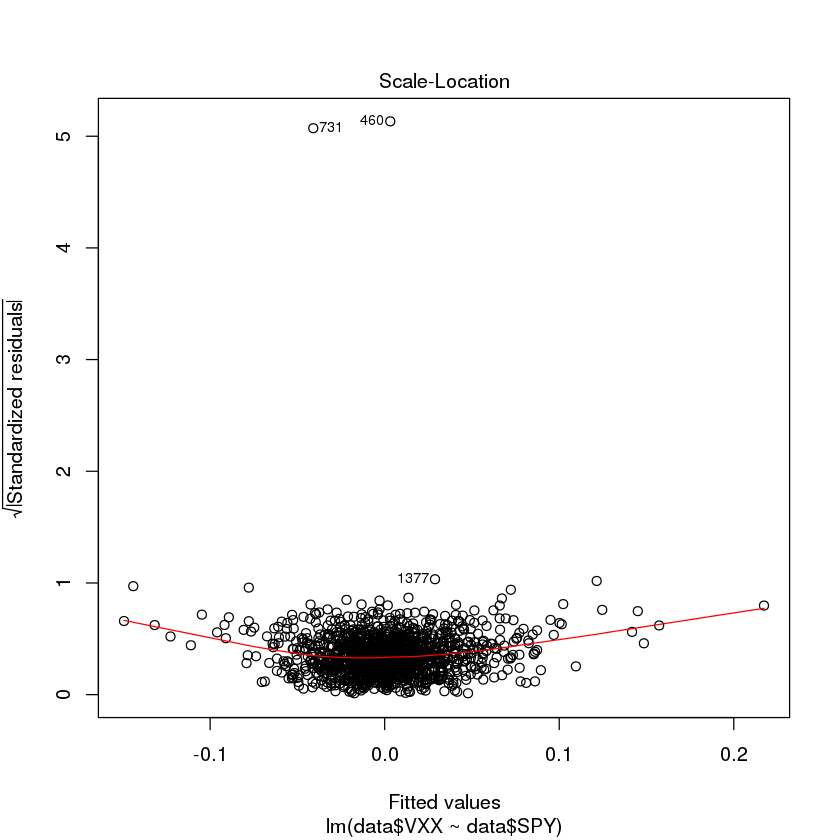

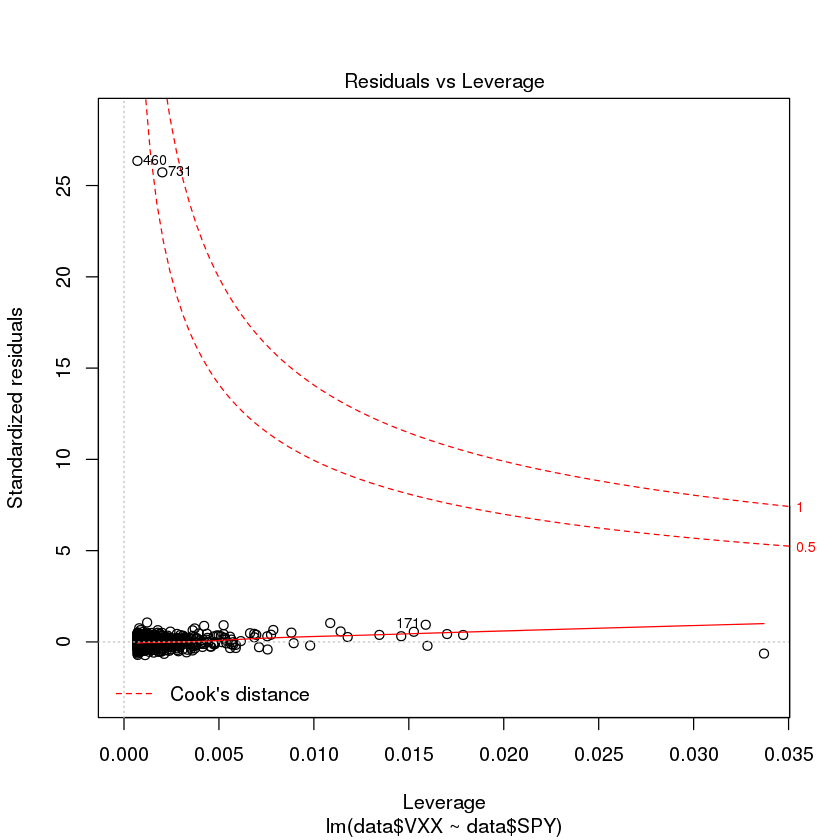

In [81]:
plot(sec_model)

Cool, there are a couple of outliers, but for today we aren't looking to be perfect. Now what if we wanted to extract some data and use it for a simulation.

## Simulation Based on Model Output
Although this is a simple model, we can use the information we've gained from our models. For example, we can use the coefficients generated to learn something about returns:

In [89]:
first_model$coefficients
sec_model$coefficients

(Intercept)      data$SPY 
-0.0004542561  0.4812851788

(Intercept)     data$SPY 
 0.003379885 -3.284659091

This output tells us that `GDX` covaries positively with the market while the `VXX` covaries negatively, but the intercepts differ to a greater degree. The ratios are 

In [101]:
a_ratio <- -as.numeric(first_model$coefficients[1]/sec_model$coefficients[1])
b_ratio <- -as.numeric(first_model$coefficients[2]/sec_model$coefficients[2])
a_ratio
b_ratio

[1] 0.1343999

[1] 0.1465252

Because of this, perhaps we can benefit from building a **beta-neutral portfolio**. The idea goes that if we buy shares in `VXX` and shares in `GDX` at the ratio `b_ratio`, the volatility of each should offset, but we will earn the difference in the intercepts. To see this, we'll assume we start with $\$100$ and that we build a portfolio whose weights have a ratio equal $b =$ `b_ratio`:
$$
\begin{align*}
    &&\frac{\pi}{1- \pi} &= b\\
    & \Leftrightarrow & \pi &= \frac{b}{1 + b} 
\end{align*}
$$

In [108]:
b_ratio <- 1/b_ratio
pi <- b_ratio/(1 + b_ratio)
pi

[1] 0.8722007

In [110]:
# With this portfolio weight we expect to earn a positive return
# with zero beta
as.numeric(pi*first_model$coefficients[1] + (1-pi)*sec_model$coefficients[1])
as.numeric(pi*first_model$coefficients[2] + (1-pi)*sec_model$coefficients[2])


[1] 3.574459e-05

[1] -1.110223e-16

In other words, we will buy $\$87.20$ worth of shares in `GDX` and $\$12.8$ worth of shares in `VXX`. We can then track the value of our portfolio throughout the period. Here's how that looks:

In [121]:
# Add several columns to our data frame
data['portfolio_value'] <- NA
data[1, 'portfolio_value'] <- 100
data['portfolio_returns'] <- NA
for(row in rownames(data)){
    data[row, 'portfolio_returns'] <- (1 - pi)*data[row, 'VXX'] + pi*data[row, 'GDX']
}
i <- 1
while(i < dim(data)[1]){
    data[i + 1, 'portfolio_value'] <- data[i, 'portfolio_value']*(1 + data[i, 'portfolio_returns'])
    i <- i + 1
}
data

SPY                   GDX                   VXX
2010-12-08   0.00364302766883714   -0.0189368669750817     -0.02741788157423
2010-12-09    0.0038744218844987   0.00373897545117173   -0.0130793064576113
2010-12-10   0.00579991146702562   0.00372629075526431   -0.0106561058154858
2010-12-13  0.000622085394062693   0.00906153119848593    0.0146659976963748
2010-12-14  0.000862560611042256  -0.00146702815339453    0.0054072888453823
2010-12-15  -0.00459124842103955   -0.0183677855447927    0.0228599724124533
2010-12-16   0.00578398075425934   -0.0134627003836348    -0.019620798427698
2010-12-17  -0.00418104349715641    0.0044722342985163   -0.0177027904971355
2010-12-20     0.002394297322149   0.00213173194677761   -0.0222007803786426
2010-12-21   0.00632111896981944 -0.000349391058912981   -0.0173664154094607
2010-12-22   0.00309111781947733   -0.0117450081684978  -0.00545103576823193
2010-12-23  -0.00145025616639507  0.000816366703904373    0.0322036518528937
2010-12-27  0.000374833354214907  -0.00586730179452593    0.0174370302509979
2010-12-28   0.00141200276816419    0.0260123538681485    0.0121999671931333
2010-12-29  0.000697410715651316   0.00358345221624511   -0.0136319361410892
2010-12-30  -0.00160472459486027  -0.00702997600069976    -0.012516541871784
2010-12-31   0.00022217920477574   0.00967475727965706  -0.00819146515864477
2011-01-03    0.0103174480786515   -0.0114082328095672   -0.0297998345769714
2011-01-04 -0.000570142256509884   -0.0288162819163205  -0.00440394079061792
2011-01-05   0.00517845921822633   -0.0135738883498976   -0.0137819078502771
2011-01-06  -0.00197918161771119   -0.0254413479208016   0.00277035337821604
2011-01-07  -0.00198165552910658 -1.91780821917808e-05   0.00332062152816169
2011-01-10  -0.00127897173990757   0.00262303673425931  -0.00140748279643802
2011-01-11   0.00352329352091893    0.0201939365022277   -0.0294650201674277
2011-01-12   0.00900403025459048  -0.00243266023996572   -0.0432374638930279
2011-01-13  -0.00165382681231899   -0.0319722394149226   -0.0131823188096986
2011-01-14   0.00722419799406179   -0.0208947320821223    -0.043063952428782
2011-01-18   0.00167955933714488    0.0169241460229386    -0.032014347329917
2011-01-19  -0.00982738384263963  -0.00611401588934972    0.0529885878531194
2011-01-20  -0.00134743827605536   -0.0149849966803469   -0.0102767344645274
⋮                              ⋮                     ⋮                     ⋮
2016-06-27   -0.0179468412041977    0.0115517613621815  -0.00122539984860673
2016-06-28    0.0180004100735868    -0.017034841013346     -0.10176072659452
2016-06-29    0.0169919773169724    0.0206410752909671   -0.0550025038555748
2016-06-30    0.0136099460576166    0.0205904977421227   -0.0322710754432615
2016-07-01   0.00206209260591335    0.0483196390849125   -0.0304511005525082
2016-07-05  -0.00723154411401376    0.0202714552060059    0.0171386415951384
2016-07-06   0.00596080639575988    0.0313395667140334   -0.0235318468006355
2016-07-07 -0.000659801375673943   -0.0314430299201026   -0.0188367185086003
2016-07-08    0.0148520891889807    0.0313699507789359   -0.0644061722563376
2016-07-11   0.00348445651867284   0.00192213798054379 -0.000861466572425649
2016-07-12   0.00722364343642763   -0.0392554123019072   -0.0221708735683809
2016-07-13 -0.000182028444369941    0.0329507655390924   -0.0151304791649921
2016-07-14   0.00553962339699413  -0.00531225822860745 -0.000894899446225525
2016-07-15  -0.00138565038003754   -0.0112983212587584  -0.00515456815476886
2016-07-18   0.00264347381517608   0.00363875548893203   -0.0171671232876712
2016-07-19  -0.00105906385856587   -0.0103826925713032  -0.00439786645028879
2016-07-20   0.00411914135601213   -0.0566666869814537    -0.024540773499203
2016-07-21  -0.00382103408301356     0.031396000039153     0.026861993979974
2016-07-22   0.00443993338428054  -0.00316262830184819   -0.0244993539510677
2016-07-25  -0.00275977644879107   -0.0365275383098469  -0.00541536650274096
2016-07-26  0.00041913592

vars    n mean   sd median trimmed  mad   min  max range skew kurtosis se
X1    1 1416    0 0.03      0       0 0.02 -0.09 0.37  0.46 3.94    53.19  0

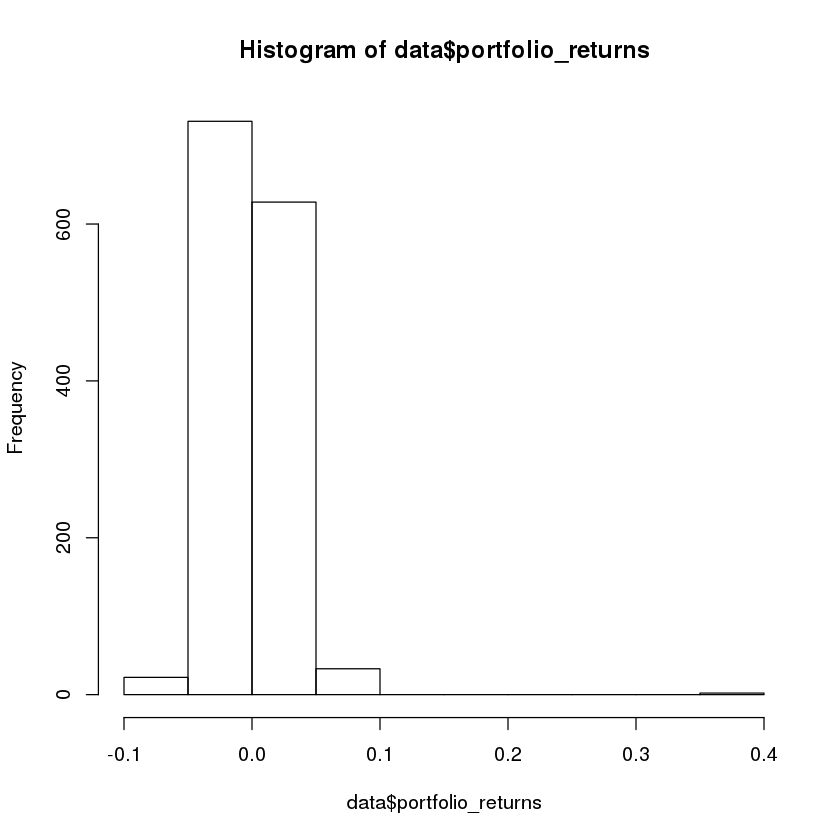

In [124]:
describe(data$portfolio_returns)
hist(data$portfolio_returns)

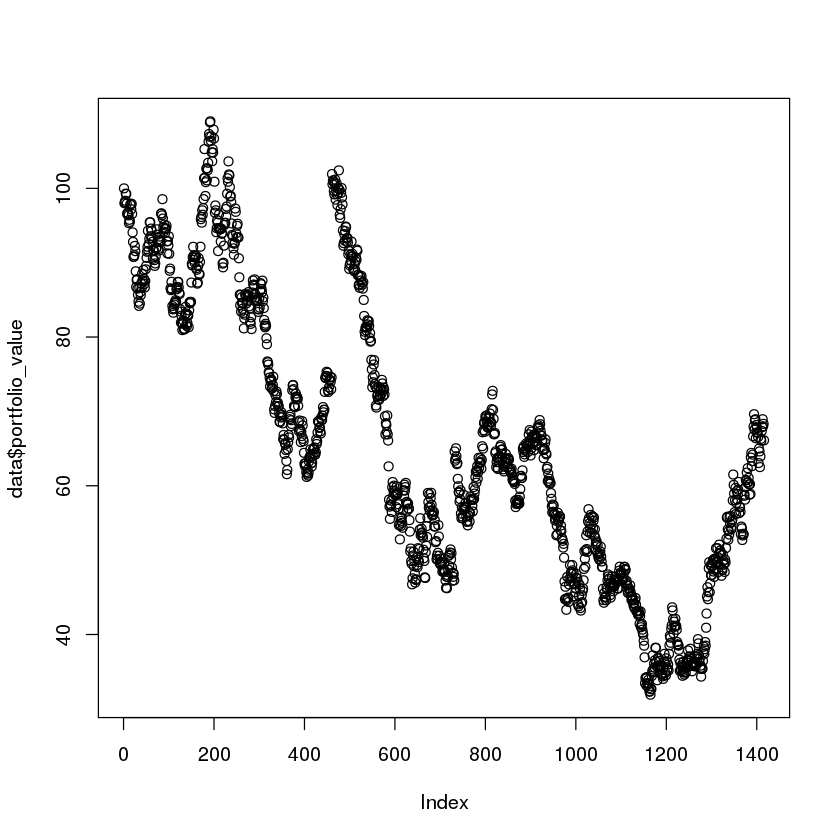

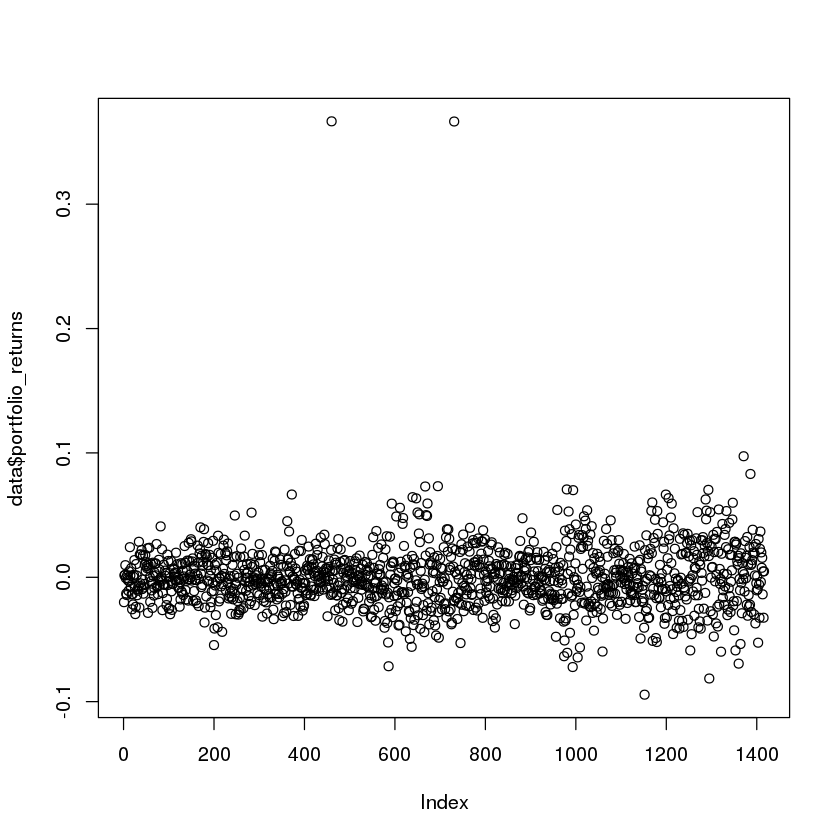

In [125]:
plot(data$portfolio_value)
plot(data$portfolio_returns)

In [126]:
#install.packages("psych", repos="http://cran.us.r-project.org")
library(psych)

In [128]:
describe(data$portfolio_returns)
describe(data$GDX)
describe(data$VXX)

vars    n mean   sd median trimmed  mad   min  max range skew kurtosis se
X1    1 1416    0 0.03      0       0 0.02 -0.09 0.37  0.46 3.94    53.19  0

vars    n mean   sd median trimmed  mad   min  max range skew kurtosis se
X1    1 1416    0 0.03      0       0 0.02 -0.11 0.11  0.22  0.1     1.05  0

vars    n mean   sd median trimmed  mad   min  max range  skew kurtosis se
X1    1 1416    0 0.12  -0.01       0 0.03 -0.13 2.94  3.08 21.78   538.83  0

Notice that on average our portfolio returned exactly the predicted amount:

In [119]:
pi*first_model$coefficients[1] + (1 - pi)*sec_model$coefficients[1]
describe(data$GDX)$mean*pi + (1-pi)*describe(data$VXX)$mean

(Intercept) 
3.574459e-05

[1] 3.574459e-05

But at the same time we lost a lot of money! What the heck, finance?! This is driven by several issues, from the simplicity of our model to non-stationarity to outliers pulling up the expected returns on the VXX.

Really, this was low hanging fruit and if it were the case that we could build a risk free portfolio that easily, everyone would be filthy rich! If these kinds of issues interest you, go pick up a book on portfolio theory!

## Conclusion
That's it! ... We should have covered the following:
1. See the basic syntax for linear models.
3. Study summary statistics from our linear model.
4. Extract data from the linear model object.

The example given here was a simple one from finance, but the approach is the same for all linear models, with small adjustments here and there.

# Homework:

1. Using the data set built during class, write a short script that fits all of the models, estimating the $\beta$'s for every etf.
2. Write a function that takes in the data set, estimates the betas, and prints to the screen a table containing the beta for each etf.
2. Choose one stock and print to the screen the predicted returns as a function of market returns.
3. Create two time series, each starting at $1$, and simulate their values under the predicted returns and true returns. Comment on the differences.
5. Write a loop starting from the $100$th row (**NOTE:** there are days missing, but at least they are in order) and for each following row, fit a new model using all past returns. Use the fitted model to predict the next day's price based on the current days **true** price from problem 4. 